## importing lib

In [1]:
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter

import matplotlib.pyplot as plt
from PIL import Image

### function

In [2]:
def openAndRescale(path, rs=-1):
    basewidth = rs
    rgb = Image.open(path).convert('RGB')
    if(rs != -1):
        wpercent = (basewidth/float(rgb.size[0]))
        hsize = int((float(rgb.size[1])*float(wpercent)))
        rgb = rgb.resize((basewidth,hsize), Image.ANTIALIAS)
    rgb = np.array(rgb).astype(int)
    return rgb

def rgbTogray(rgb_img):
    if(len(rgb_img.shape) == 2):
        return rgb_img
    return np.dot(rgb_img[::],[0.2989, 0.5870, 0.1140]).astype(int)

def FAST(gray,epsilon,n):
    poi = np.zeros((gray.shape))
    
    circle = np.array([[0,3],
            [-1,3],
            [-2,2],
            [-3,1],
            [-3,0],
            [-3,-1],
            [-2,-2],
            [-1,-3],
            [0,-3],
            [1,-3],
            [-2,2],
            [-1,3],
            [0,3],
            [1,3],
            [2,2],
            [1,3]
           ])

    for x in range(3,gray.shape[0]-3):
        for y in range(3,gray.shape[1]-3):
            poiVal = 0

            for i in range(0,16,4):
                if np.abs(gray[x + circle[i,0]][y + circle[i,1]] - gray[x][y]) >= epsilon:
                    poiVal += 1
            if poiVal < 3:
                continue

            poiVal = 0

            for i in range(16):
                if np.abs(gray[x + circle[i,0]][y + circle[i,1]] - gray[x][y]) >= epsilon:
                    poiVal += 1
                else:
                    if poiVal >= n:
                        break
                    poiVal = 0
                    
            
            if poiVal >= n:
                poi[x][y] = poiVal
    return poi

### demo

In [3]:
def poiFromImage(path,rescale=-1,sigma=0,espilon=5,n=12):
    rgb = openAndRescale(path,rescale)

    gray = rgbTogray(rgb)

    graygs = gaussian_filter(gray, sigma=sigma)

    poi = FAST(graygs,espilon,n)

    plt.figure()
    notZero = np.nonzero(poi)
    plt.figure(figsize=(500//80, 500//80))
    plt.scatter(notZero[1],notZero[0],s=10,c="#ff0000")
    plt.imshow(rgb,cmap="gray")
    plt.show()


<Figure size 432x288 with 0 Axes>

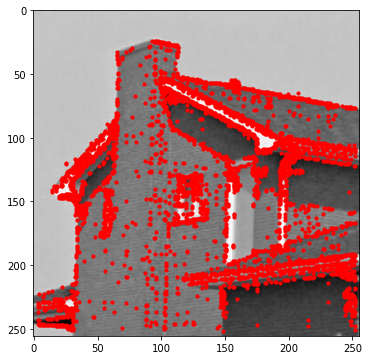

In [13]:
poiFromImage("img/house2.png",espilon=8)

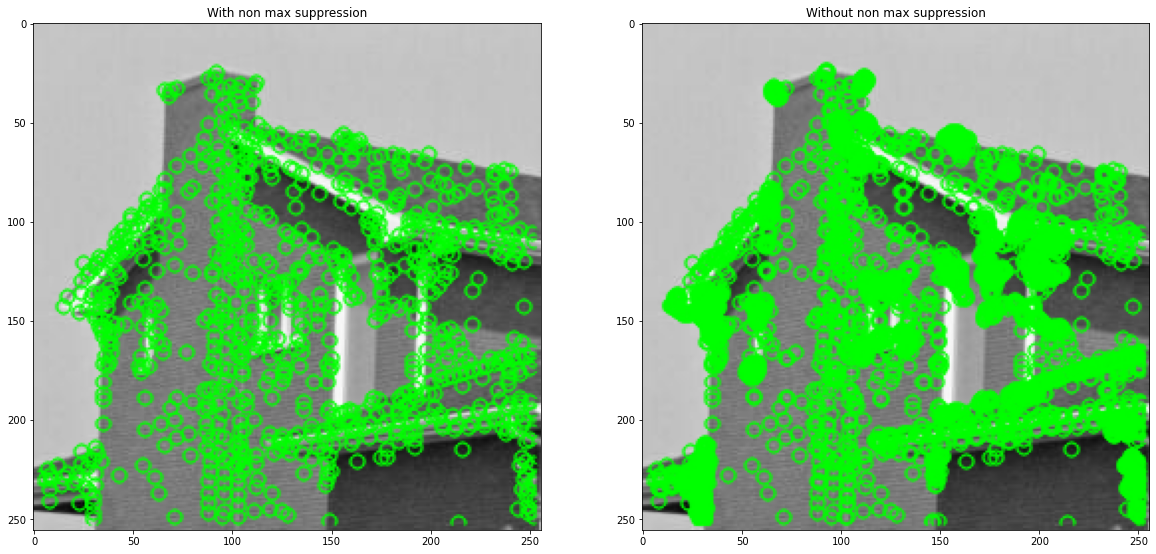

In [10]:
image1 = cv2.imread("img/house2.png")

# Convert  image to RGB
image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert image to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

fast = cv2.FastFeatureDetector_create() 

# Detect keypoints with non max suppression
keypoints_with_nonmax = fast.detect(gray, None)

# Disable nonmaxSuppression 
fast.setNonmaxSuppression(False)

# Detect keypoints without non max suppression
keypoints_without_nonmax = fast.detect(gray, None)

image_with_nonmax = np.copy(image)
image_without_nonmax = np.copy(image)

# Draw keypoints on top of the input image
cv2.drawKeypoints(image, keypoints_with_nonmax, image_with_nonmax, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(image, keypoints_without_nonmax, image_without_nonmax, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without non max suppression
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("With non max suppression")
plots[0].imshow(image_with_nonmax)

plots[1].set_title("Without non max suppression")
plots[1].imshow(image_without_nonmax)